<a href="https://colab.research.google.com/github/yusuf302/Codveda-internship-data-analysis/blob/main/Churn_Prediction_yaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries
# Data Handling

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

# Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing / Uploading Data set


# Load dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn-bigml-20.csv to churn-bigml-20.csv


# Display first 5 rows

In [ ]:
df = pd.read_csv("churn-bigml-20.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


# Data cleaning and preprocessing

# Chech the data set structure

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

# Goal is to identify numeric vs categorical columns and see if there are missing values.

# Overall: The dataset is well-structured and of high quality, providing a solid foundation for deriving insights, identifying patterns, and building models to predict customer churn effectively.

In [ ]:
duplicates = df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
662    False
663    False
664    False
665    False
666    False
Length: 667, dtype: bool


# The output shows that all values are False, which means: There are no duplicate rows in your dataset.

# Encode categorical variables

## Initialize label Encoder

In [ ]:
le = LabelEncoder()

## Encode Categorical columns

In [ ]:
for col in ['State','Area code','International plan','Voice mail plan','Churn']:
    df[col] = le.fit_transform(df[col])

## Verify encoding

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,1,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,1,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,1,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,2,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


## Categorical variables have been encoded into numeric values so they can be used in machine learning models. This transformation allows algorithms like logistic regression to process the data effectively while maintaining the integrity of the original information.

# Exploratory Data Analysis (EDA)

## Summary statistics for numeric features


In [ ]:
df.describe()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,26.152924,102.841079,0.988006,0.079460,0.283358,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718,0.142429
std,14.441785,40.819480,0.703812,0.270659,0.450967,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357,0.349752
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,76.000000,0.000000,0.000000,0.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,26.000000,102.000000,1.000000,0.000000,0.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000,0.000000
75%,39.000000,128.000000,1.000000,0.000000,1.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000,0.000000
max,50.000000,232.000000,2.000000,1.000000,1.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000,1.000000


## We use summary statistics to understand the central tendency, dispersion, and distribution of numeric features. This includes measures like mean, median, minimum, maximum, and standard deviation, which help identify anomalies or unusual patterns in the data.

# Churn Distribution

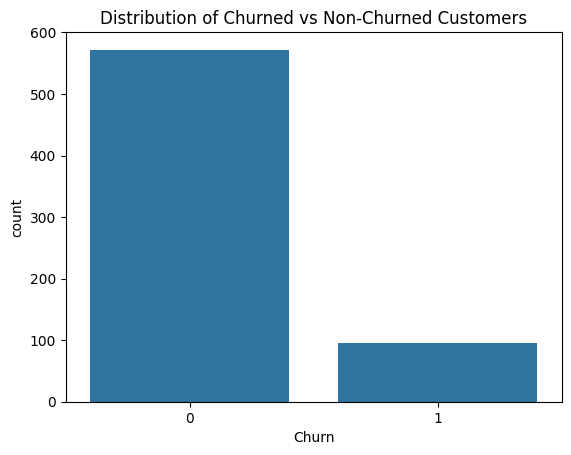

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title("Distribution of Churned vs Non-Churned Customers")
plt.show()

### While most customers remain loyal, the relatively smaller churn group is crucial for analysis because these customers represent potential revenue loss.

### Any predictive model should account for this imbalance to accurately identify churned customers, as predicting only the majority class would result in high overall accuracy but poor detection of churn cases.

### This insight emphasizes the importance of careful feature selection, model evaluation metrics (like F1-score, precision, recall), and possibly data balancing techniques in the churn prediction task.



#### *   This plot shows the balance between customers who churned and those who did not. Understanding the target variable distribution is crucial for building predictive models, as imbalanced classes may require special handling.



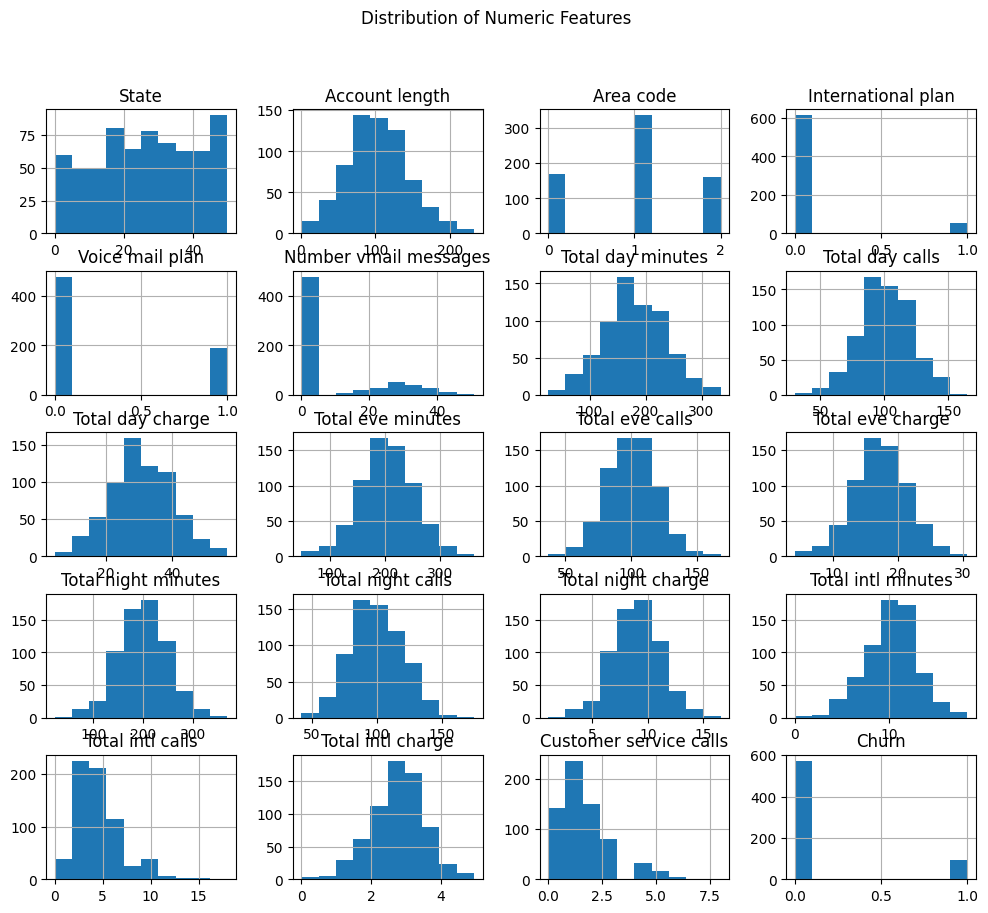

In [ ]:
df.hist(figsize=(12,10))
plt.suptitle("Distribution of Numeric Features")
plt.show()


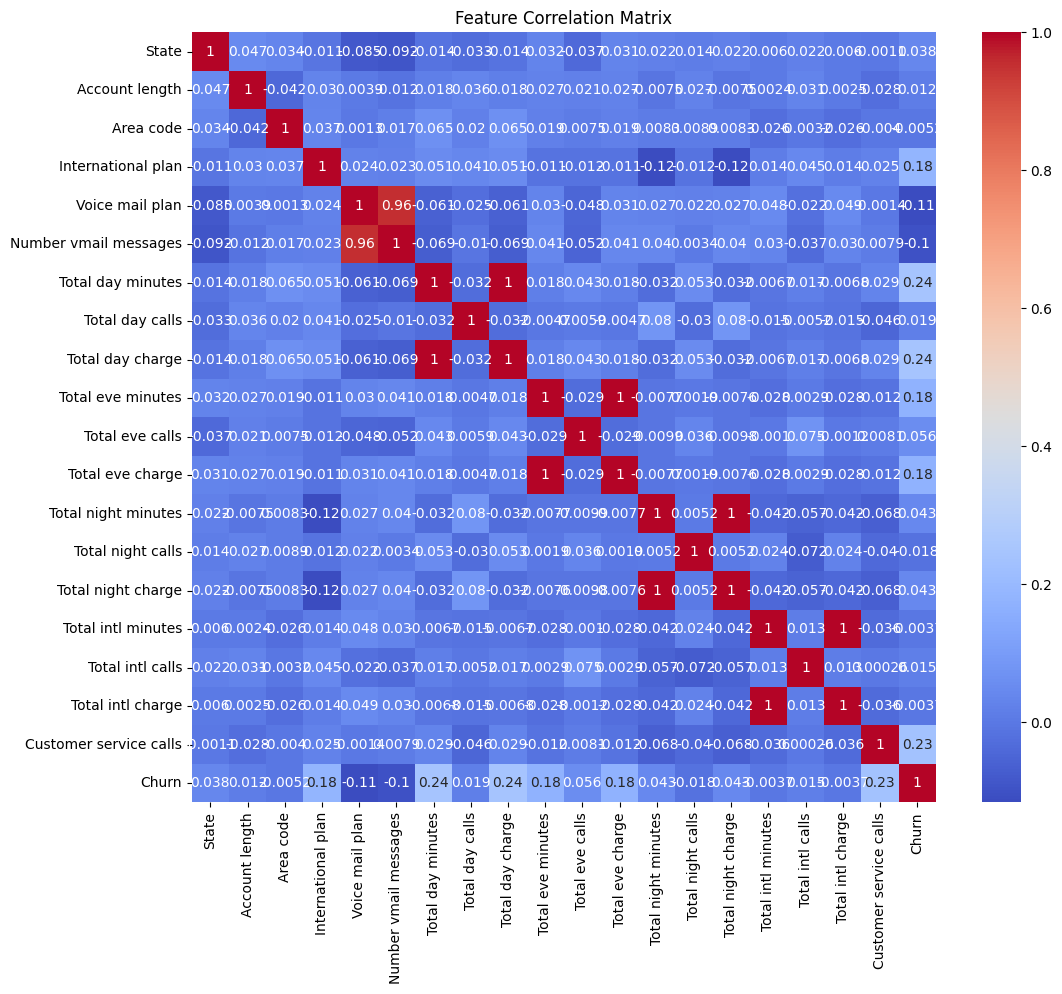

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()




*   ##### The correlation heatmap shows the strength and direction of relationships between numeric features. Strong correlations can indicate potential multicollinearity, which is important to consider in predictive modeling. Features highly correlated with Churn are likely important for prediction.



# Example: Total day minutes vs Churn


/tmp/ipython-input-544372936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Total day minutes', data=df, palette='pastel')


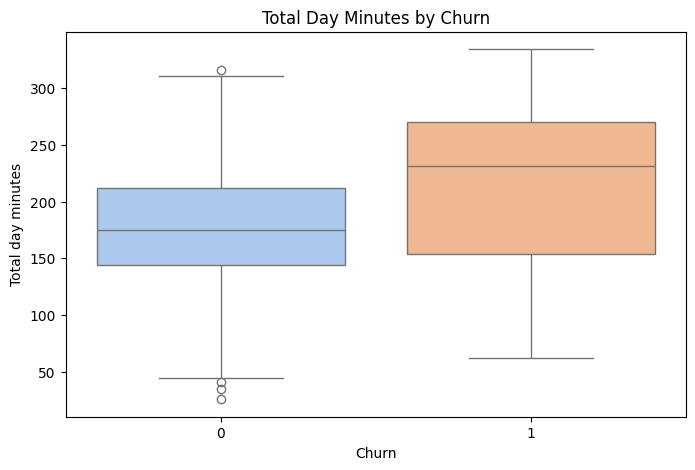

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='Total day minutes', data=df, palette='pastel')
plt.title("Total Day Minutes by Churn")
plt.show()


# Preparing data for modeling.

## separate features and targets

In [ ]:
# Features
X = df.drop('Churn', axis=1)

# Target
y = df['Churn']

We separate the input variables (features) from the target variable (Churn). Features are used to predict whether a customer will churn.

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


The dataset is split into training and testing sets to evaluate model performance on unseen data. Stratifying by Churn ensures the class distribution remains the same in both sets.

# Logistic regression modeling

### Initialize and train logistic regression


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

# Conclusion

Based on the exploratory data analysis:

*   The dataset is clean with no missing values or duplicate rows.
*   Categorical variables have been successfully encoded for modeling.
*   There is a class imbalance in the target variable 'Churn', with fewer churned customers than non-churned customers. This should be considered during model building and evaluation.
*   The distribution of numeric features has been visualized, providing insights into their ranges and potential outliers.
*   The correlation heatmap revealed relationships between features and the target variable, suggesting potential predictors for churn.
*   Specifically, the box plot of 'Total day minutes' by 'Churn' indicates that customers who churn tend to have higher total day minutes.

These findings provide a solid foundation for building a logistic regression model to predict customer churn. Further steps would involve feature selection, model training, evaluation using appropriate metrics for imbalanced datasets, and potentially addressing the class imbalance.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X = df.select_dtypes(include=['int64', 'float64'])
X.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,117,0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,15,65,1,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,34,161,1,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,40,111,1,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,11,49,2,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


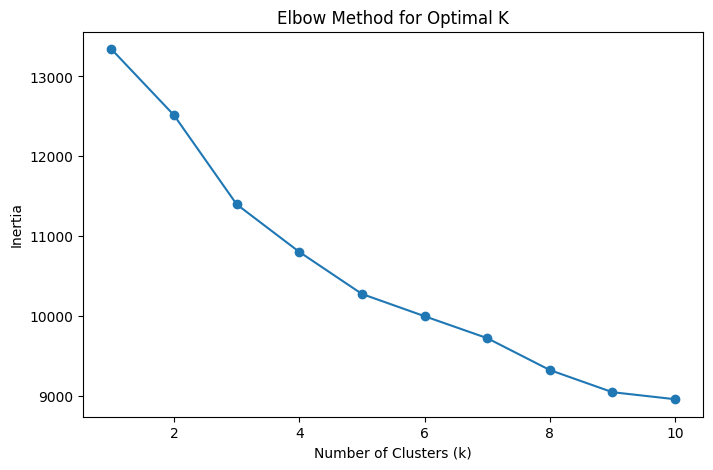

In [ ]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Apply K-Means with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to your dataset
df['Cluster'] = kmeans.labels_

# View how many customers are in each cluster
print(df['Cluster'].value_counts())


Cluster
3    193
1    182
2    164
0    128
Name: count, dtype: int64


# Task
Evaluate the logistic regression model, interpret the model coefficients, address class imbalance, re-train and evaluate the model with balanced data, analyze clusters and churn, and summarize the findings.

## Evaluate the logistic regression model

### Subtask:
Calculate and display relevant evaluation metrics (accuracy, precision, recall, F1-score, confusion matrix) on the test set.


**Reasoning**:
Calculate and display the evaluation metrics for the logistic regression model on the test set.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.8582
Precision: 0.5000
Recall: 0.1579
F1-score: 0.2400

Confusion Matrix:
[[112   3]
 [ 16   3]]


## Interpret model coefficients

### Subtask:
Examine the coefficients of the trained logistic regression model to understand the impact of each feature on the likelihood of churn.


**Reasoning**:
Access the model coefficients and feature names, then create and print a sorted Series of coefficients to understand feature importance.



In [ ]:
coefficients = model.coef_[0]
feature_names = X_train.columns

coef_series = pd.Series(coefficients, index=feature_names)

sorted_coef = coef_series.sort_values(ascending=False)

print("Model Coefficients (Sorted):")
print(sorted_coef)

Model Coefficients (Sorted):
Customer service calls    0.800216
International plan        0.545914
Total day minutes         0.383709
Total day charge          0.383674
Total eve charge          0.324871
Total eve minutes         0.324740
Total eve calls           0.171960
Total night charge        0.160723
Total night minutes       0.160504
Total intl charge         0.111813
Total intl minutes        0.110503
Total day calls           0.109856
State                     0.030404
Account length           -0.002603
Total intl calls         -0.003226
Total night calls        -0.083684
Area code                -0.127907
Voice mail plan          -0.264523
Number vmail messages    -0.275757
dtype: float64


## Address class imbalance

### Subtask:
Implement a technique to handle the class imbalance in the dataset, such as using SMOTE to oversample the minority class.


**Reasoning**:
Implement SMOTE to handle class imbalance by importing the necessary library, instantiating the SMOTE object, resampling the training data, and verifying the class distribution.



In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Original training data class distribution:")
print(y_train.value_counts())

print("\nResampled training data class distribution:")
print(y_train_resampled.value_counts())

Original training data class distribution:
Churn
0    457
1     76
Name: count, dtype: int64

Resampled training data class distribution:
Churn
0    457
1    457
Name: count, dtype: int64


## Re-train and evaluate model with balanced data

### Subtask:
Re-train the logistic regression model again on the balanced data and evaluate its performance using the same metrics.


**Reasoning**:
Instantiate, train, and evaluate the logistic regression model on the balanced data.



In [ ]:
model_balanced = LogisticRegression(random_state=42)
model_balanced.fit(X_train_resampled, y_train_resampled)

y_pred_balanced = model_balanced.predict(X_test_scaled)

print("Evaluation on Balanced Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_balanced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_balanced):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_balanced):.4f}")

conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)
print("\nConfusion Matrix (Balanced Data):")
print(conf_matrix_balanced)

Evaluation on Balanced Data:
Accuracy: 0.7985
Precision: 0.3667
Recall: 0.5789
F1-score: 0.4490

Confusion Matrix (Balanced Data):
[[96 19]
 [ 8 11]]


## Analyze clusters and churn

### Subtask:
Explore the characteristics of the clusters you created and analyze the churn rate within each cluster to identify segments with higher churn.


**Reasoning**:
Group the dataframe by cluster and calculate the mean of all features for each cluster, then calculate and print the churn rate for each cluster and analyze the results.



In [ ]:
cluster_characteristics = df.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_characteristics)

cluster_churn_rate = df.groupby('Cluster')['Churn'].mean()
print("\nChurn Rate by Cluster:")
print(cluster_churn_rate)

Cluster Characteristics:
             State  Account length  Area code  International plan  \
Cluster                                                             
0        27.523438      106.765625   1.000000            0.179688   
1        23.917582      102.664835   0.989011            0.082418   
2        27.317073      100.164634   1.024390            0.073171   
3        26.362694      102.678756   0.948187            0.015544   

         Voice mail plan  Number vmail messages  Total day minutes  \
Cluster                                                              
0               0.023438               0.578125         235.035937   
1               1.000000              30.000000         173.726923   
2               0.024390               0.451220         194.554878   
3               0.000000               0.000000         140.323834   

         Total day calls  Total day charge  Total eve minutes  \
Cluster                                                         
0        

## Summary:

### Data Analysis Key Findings

*   The initial logistic regression model achieved an accuracy of 0.8582 but had a low recall of 0.1579 and an F1-score of 0.2400, indicating poor performance in identifying churn cases (True Positives = 3, False Negatives = 16).
*   Feature coefficients from the initial model showed that 'Customer service calls', 'International plan', and 'Total day minutes' had the largest positive impact on the likelihood of churn, while 'Voice mail plan' and 'Number vmail messages' had the largest negative impact.
*   The original training data had a significant class imbalance, which was successfully addressed by applying SMOTE to create a balanced training dataset.
*   After re-training the model on the balanced data, recall significantly improved to 0.5789 (True Positives = 11, False Negatives = 8), and the F1-score increased to 0.4490. However, precision decreased to 0.3667, and accuracy slightly dropped to 0.7985.
*   Cluster analysis revealed that Cluster 0 had a significantly higher churn rate (approximately 47.7%) compared to Clusters 1, 2, and 3 (churn rates between 4.3% and 7.3%).
*   Customers in the high-churn Cluster 0 were characterized by a higher likelihood of having an international plan, a lower likelihood of having a voicemail plan, and a higher number of customer service calls.

### Insights or Next Steps

*   While balancing the dataset improved the model's ability to detect churn, there is a trade-off with precision. Further optimization techniques or model selection could be explored to balance recall and precision effectively.
*   The identified high-churn Cluster 0 provides a clear target segment for focused customer retention strategies. Interventions could include addressing the characteristics of this cluster, such as improving international plan offerings, promoting voicemail plans, or reducing the need for customer service calls.
